In [1]:
import pandas as pd, GPy, seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
%run load_data.py

In [23]:
Y = mod_activities.T.copy()
Y -= Y.mean()
Y /= Y.std()
Y = Y.dropna(axis=1).values

In [24]:
m = GPy.models.BayesianGPLVM(Y, 6, num_inducing=20)

In [25]:
m.likelihood.fix(0.1)
m.optimize(messages=1, max_iters=300)

In [26]:
m.likelihood.unfix()
m.optimize(messages=1, max_iters=3e5)

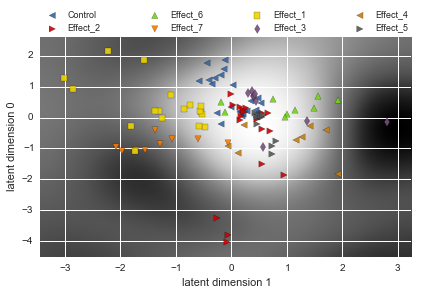

In [27]:
m.plot_magnification(labels=design.Effect)

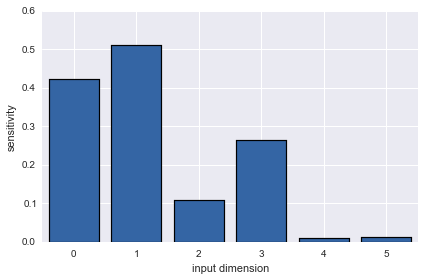

In [29]:
m.kern.plot_ARD()